# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
#table=soup.find_all('div', class_='table')[0]
#table

#rows = table.find_all('tr')

weather_table = mars_weather_soup.find('table', class_='table')


weather_table = mars_weather_soup.find('table', class_='table')

# Check table
if weather_table:
    # Extract all rows from table
    rows = weather_table.find_all('tr')
    weather_data = []

    for row in rows:
        cells = row.find_all(['th', 'td'])
        row_data = [cell.text.strip() for cell in cells]
        weather_data.append(row_data)

    for data in weather_data:
        print(data)
else:
    print("No table was found.")


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [18]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all data cells within the row (both 'th' and 'td' tags might be important)
    cells = row.find_all(['th', 'td'])
    # Extract text from each cell and create a row list
    row_data = [cell.text for cell in cells]
    # Append the row data list to the main data list
    weather_data.append(row_data)

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a DataFrame using the row data and the column names
mars_weather_df = pd.DataFrame(weather_data, columns=column_names)


In [20]:
# Confirm DataFrame was created successfully
print(mars_weather_df.head())

   id  terrestrial_date  sol   ls  month  min_temp  pressure
0  id  terrestrial_date  sol   ls  month  min_temp  pressure
1   2        2012-08-16   10  155      6     -75.0     739.0
2  13        2012-08-17   11  156      6     -76.0     740.0
3  24        2012-08-18   12  156      6     -76.0     741.0
4  35        2012-08-19   13  157      6     -74.0     732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [22]:
# Change data types for data analysis

mars_weather_df['sol'] = mars_weather_df['sol'].astype('int64')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int64')
mars_weather_df['month'] = mars_weather_df['month'].astype('int64')

# Convert 'min_temp' and 'pressure' to float64
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64')
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')


ValueError: invalid literal for int() with base 10: 'sol'

In [23]:
# Confirm type changes were successful by examining data types again

print(mars_weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?

# Find the table containing data
weather_table = mars_weather_soup.find('table', class_='table')

# Extract 'month' and 'id' values
months = []
ids = []

# Extract data from table rows
for row in weather_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 0:  # Skip header row
        continue
    ids.append(int(cells[0].text.strip()))
    months.append(int(cells[4].text.strip()))  # Extract 'month' value

# Create DataFrame
mars_weather_df = pd.DataFrame({'id': ids, 'month': months})

print(mars_weather_df)


        id  month
0        2      6
1       13      6
2       24      6
3       35      6
4       46      6
...    ...    ...
1862  1889      5
1863  1892      5
1864  1894      5
1865  1893      5
1866  1895      5

[1867 rows x 2 columns]


In [25]:
# Group the DataFrame by 'month' and aggregate 'id' column
combined_df = mars_weather_df.groupby('month')['id'].agg(list).reset_index()

print(combined_df)

    month                                                 id
0       1  [320, 319, 323, 322, 321, 324, 325, 326, 328, ...
1       2  [371, 376, 375, 377, 378, 379, 380, 381, 385, ...
2       3  [421, 422, 473, 480, 423, 434, 433, 427, 426, ...
3       4  [487, 490, 489, 488, 491, 492, 494, 495, 493, ...
4       5  [552, 554, 555, 553, 556, 557, 558, 559, 561, ...
5       6  [2, 13, 24, 35, 46, 57, 68, 79, 112, 114, 123,...
6       7  [196, 197, 198, 199, 200, 201, 202, 203, 204, ...
7       8  [7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, ...
8       9  [59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 7...
9      10  [107, 108, 109, 116, 117, 118, 119, 120, 121, ...
10     11  [139, 140, 141, 142, 143, 144, 146, 147, 148, ...
11     12  [263, 264, 265, 266, 267, 286, 276, 287, 283, ...


In [31]:
# 2. How many Martian days' worth of data are there?

num_martian_days = sum(len(ids) for ids in mars_weather_df['id'])

print("Number of Martian days' worth of data:", num_martian_days)


Number of Martian days' worth of data: 1867


In [32]:
# 3. What is the average low temperature by month?
# Find the table containing the data
weather_table = mars_weather_soup.find('table', class_='table')

# Extract 'month' and 'min_temp' 
months = []
min_temps = []

# Extract data from table rows
for row in weather_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 0:  # Skip header row
        continue
    months.append(int(cells[4].text.strip()))  # Extract 'month' value
    min_temps.append(float(cells[5].text.strip()))  # Extract 'min_temp' value

# Create DataFrame 
mars_weather_df = pd.DataFrame({'month': months, 'min_temp': min_temps})

# Group by month & calculate
avg_low_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(avg_low_temp_by_month)


Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


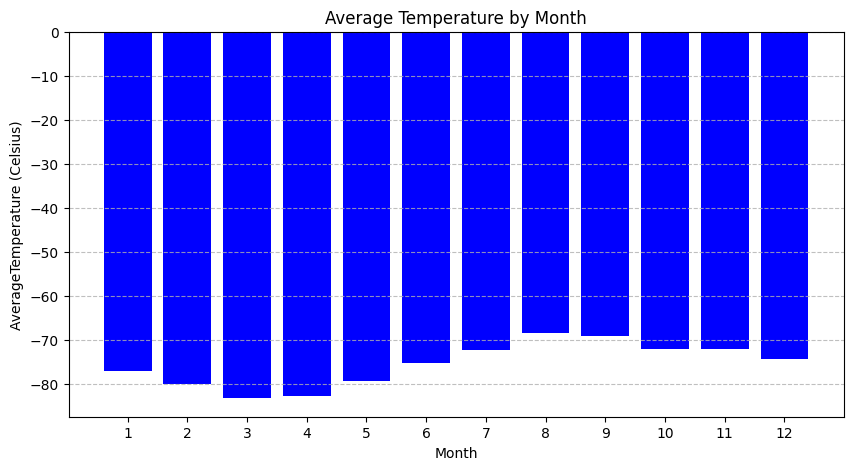

In [88]:
# Plot the average temperature by month
plt.figure(figsize=(10, 5))
plt.bar(avg_low_temp_by_month.index, avg_low_temp_by_month.values, color='blue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('AverageTemperature (Celsius)')
plt.xticks(avg_low_temp_by_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()


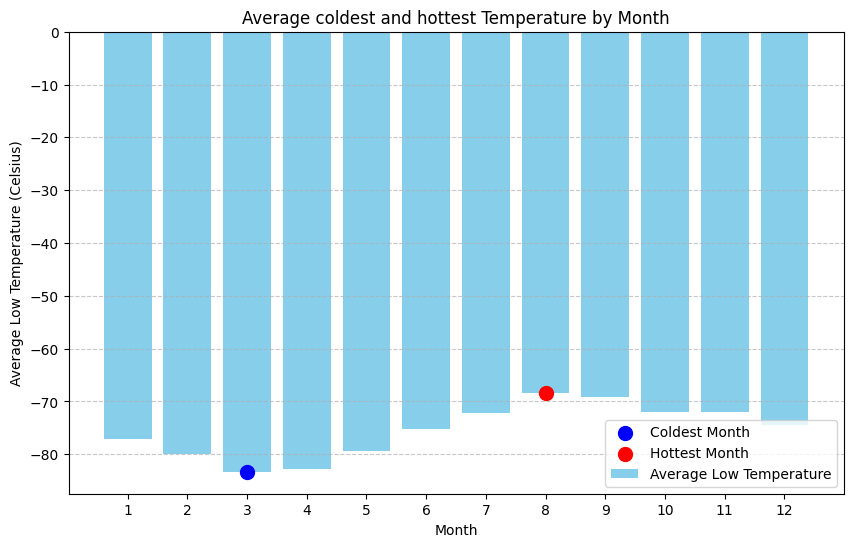

In [89]:
# Identify the coldest and hottest months in Curiosity's location

import matplotlib.pyplot as plt

# Plot the average temperature
plt.figure(figsize=(10, 6))
plt.bar(avg_low_temp_by_month.index, avg_low_temp_by_month.values, color='skyblue', label='Average Low Temperature')
plt.scatter(coldest_month, coldest_avg_temp, color='blue', label='Coldest Month', marker='o', s=100)
plt.scatter(hottest_month, hottest_avg_temp, color='red', label='Hottest Month', marker='o', s=100)
plt.title('Average coldest and hottest Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(avg_low_temp_by_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()



In [40]:
# 4. Average pressure by Martian month
pressures = []

# Extract data from table rows
for row in weather_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 0:  # Skip header row
        continue
    pressures.append(float(cells[6].text.strip()))  # Extract 'pressure' value

# Add 'pressure' data to the DataFrame
mars_weather_df['pressure'] = pressures

# Group by month and calculate the average pressure
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Print the result
print("Average pressure by Martian month:")
print(avg_pressure_by_month)


Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


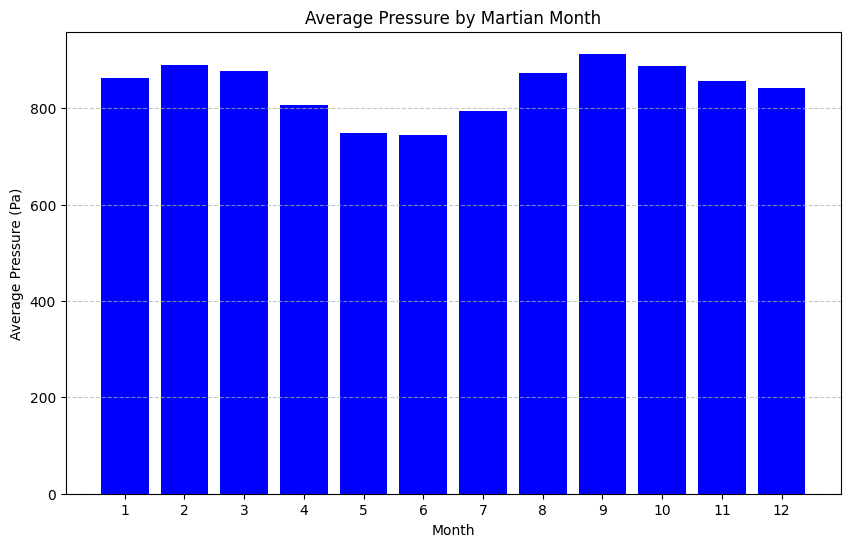

In [85]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, color='blue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(avg_pressure_by_month.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

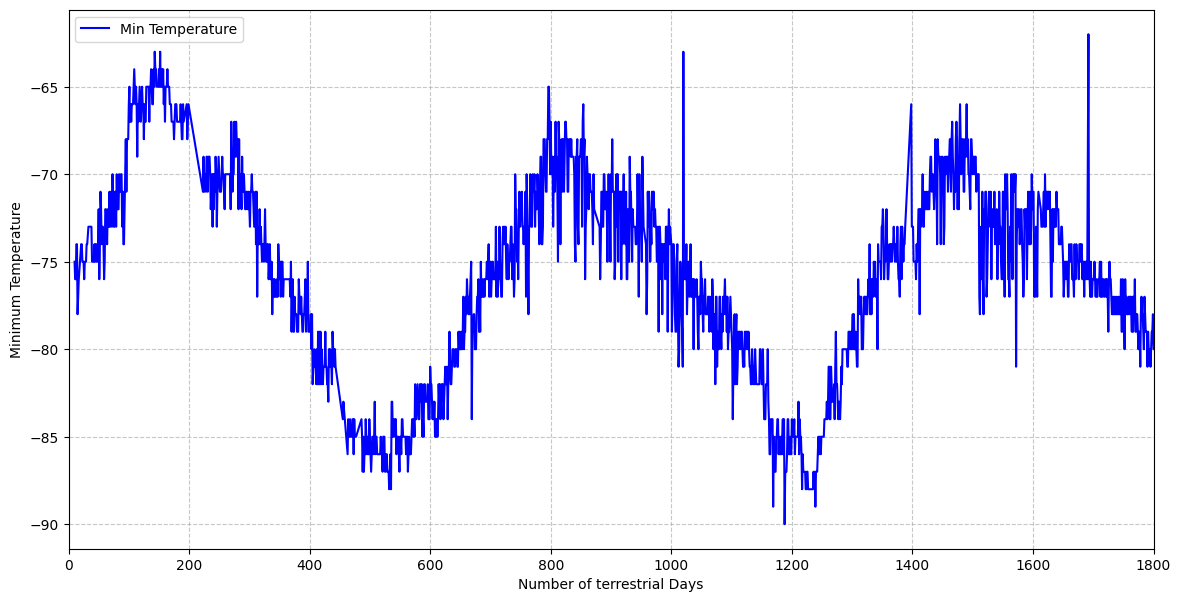

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], color='blue', label='Min Temperature')
#plt.title("Min Temperature vs. Terrestrial Days in a Martian Year")
plt.xlabel("Number of terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(0, 1800)  # Expanded range to 1800 days

plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [90]:
# Write the data to a CSV
file_path = "mars_weather_data.csv"

# Export the DataFrame to a CSV file
mars_weather_df.to_csv(file_path, index=False)

print("DataFrame has been successfully exported to CSV file:", file_path)

DataFrame has been successfully exported to CSV file: mars_weather_data.csv


In [ ]:
browser.quit()